In [1]:
# !pip install jieba

In [2]:
from __future__ import print_function
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction
from os import listdir
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
import jieba
import os
import re
import shutil
import glob
import numpy as np

In [3]:
def make_clear_dir():
    if not os.path.exists('./data/label/'):
        os.mkdir('./data/label/')
    for i in range(0, 50):
        path = './data/label/label_'+str(i)+'/'
        if not os.path.exists(path):
            os.mkdir(path)
        else:
            files = os.listdir(path)
            for file in files:
                os.remove(path + file)

In [4]:
#创建data/lable/lable_xx目录，如果存在，清除其中的数据
make_clear_dir()

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/label/'

## 1.加载数据并使用tfidf将进行向量化

In [ ]:
labels = []#用于存储所有文本标题

def load_stopwords(stopwords_file):
    fr = open('./stop.txt', encoding='UTF-8')#加载停用词表
    texts = ['\u3000','\n', '']
    for word in fr:
        word = word.strip()
        texts.append(word)
    stop_words_set = set(texts)
    return stop_words_set

def loadDataset():
    global labels
    #导入文本数据集，建立语料库
    stop_words_set = load_stopwords("./stop.txt")
    all_files = listdir('./data/filter_news_data/')
    corpus = []

    for i in range(0, len(all_files)):
        if i % 200 == 0:
            print(f'loadding {i}...')
            
        filename = all_files[i]
        
        filelabel = filename.split('.')[0]
        #将文件名添加到标签列表
        labels.append(filelabel)

        #读取文件并进行切词
        file_path = './data/filter_news_data/' + filename
        doc = open(file_path, encoding='utf-8').read()
        data = jieba.cut(doc)#对打开的文本进行分词

        #使用停用词表对内容进行过滤
        data_adj = ""
        delete_word = []
        for item in data:
            if item not in stop_words_set:
                data_adj = data_adj + item + ' '
            else:
                delete_word.append(item)

        
        corpus.append(data_adj)
    return corpus

In [ ]:
dataset = loadDataset()

Building prefix dict from the default dictionary ...


loadding 0...


Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.618 seconds.
Prefix dict has been built successfully.


loadding 200...
loadding 400...
loadding 600...
loadding 800...
loadding 1000...
loadding 1200...


In [ ]:
len(dataset)

1276

In [ ]:
#前几篇文章
dataset[:2]

['北京 月 顾仲阳 农业 农村部 国家 乡村 振兴 局 开展 国家 乡村 振兴 示范县 创建 申报 评审 工作 完成 河南省 兰考县 四川省 眉山市 东坡区 单位 入选 年 国家 乡村 振兴 示范县 创建 单位 贯彻落实 中共中央国务院 做好 年 全面 推进 乡村 振兴 重点 工作 意见 部署 农业 农村部 国家 乡村 振兴 局 开展 国家 乡村 振兴 示范县 创建 申报 评审 工作 县级 申请 市级 遴选 省级 审核 推荐 专家 评审 社会 公示 此次 创建 单位名单 开展 乡村 振兴 示范 创建 今年 中央 一号 文件 作出 部署 全面 推进 乡村 振兴 重要 抓手 ',
 '北京 月 陆娅楠 国家统计局 日 发布 党 十八 以来 经济社会 发展 成就 系列 报告 显示 年 我国 单位 国内 生产总值 能耗 比年 累计 降低 年均 下降 相当于 节约 少用 能源 约 亿吨 标准煤 规模 工业 单位 增加值 能耗 累计 降低 年均 下降 工业 节能 效果 明显 报告 显示 我国 能源 生产 结构 加速 转变 清洁 能源 占 持续 提升 年 非 化石 能源 发电 装机 首次 超过 煤电 装机容量 达到 亿千瓦 占 发电 总 装机容量 比重 水电 风电 太阳能 发电 装机 连续 多年 稳居 世界 首位 天然气 水电 核电 新能源 发电 清洁 能源 能源 生产 结构 中 占 持续上升 年 天然气 占 一次能源 生产 总量 比重 达 一次 电力 能源 比重 上升 能源 消费 清洁 低碳 加快 推进 年 煤炭 占 能源 消费 总量 比重 年 降低 石油 占 上升 天然气 占 上升 一次 电力 能源 占 上升 ']

In [ ]:
def transform(dataset, n_features = 1000):
    #将每篇文章转化成n_features的向量，向量的每个分量代表一个词，以及这个词对应的权重（即tf-idf）;
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=n_features, min_df=2, use_idf=True)
    X = vectorizer.fit_transform(dataset)

    return X, vectorizer

In [ ]:
X, vectorizer = transform(dataset, n_features=2000)

In [ ]:
X.shape

(1276, 2000)

In [ ]:
type(X[0])

scipy.sparse._csr.csr_matrix

In [ ]:
X[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#获得词汇表
fea_names = vectorizer.get_feature_names_out()
str_fea = " ".join(fea_names)
print(str_fea)

一个个 一些 一件 一份 一位 一体 一体化 一号 一国两制 一场 一块 一处 一天 一定 一家 一带 一幅 一年 一座 一张 一批 一是 一条 一次 一步 一流 一百年 一系列 一线 一致 一路 一边 一道 一项 万个 万亩 万人 万人次 万亿元 万件 万元 万吨 万户 三个 三季度 三年 上升 上半年 上合 上同 上市 上海 上级 上线 上要 下功夫 下去 下降 不到 不可 不可逆转 不忘 不想 不懈 不敢 不断丰富 不断完善 不负 不足 与时俱进 专业 专业化 专家 专精 专门 专项 专题 世界 世界观 世纪 世锦赛 业务 业态 东北 东湖 东盟 两个 两党 两国 两国人民 两国关系 两岸 两年 严峻 严格 严重 个体 中共 中共中央 中共中央国务院 中共中央政治局 中医药 中华 中华人民共和国 中华儿女 中华文化 中华文明 中华民族 中国共产党 中国化 中国史 中国式 中国队 中央 中央军委 中央委员会 中央政治局 中央政治局常委 中央纪委 中央纪律检查委员会 中小企业 中心 中方 中非 丰富 为主 主义 主任 主体 主动 主席 主张 主持 主管部门 主要 举世瞩目 举办 举措 举行 义务教育 之中 之变 之后 之路 之问 之间 之际 习近平 乡亲们 乡村 乡镇 书写 书记 了解 争取 事业 事关 事务 事项 二十 二十一 二十大 二是 云南 云南省 互利 互动 互联网 互鉴 五位一体 五年 亚洲 亚洲象 交出 交往 交易 交流 交通 产业 产业园 产业结构 产业链 产值 产品 产生 产量 享受 享有 人与自然 人们 人口 人均 人士 人居 人工智能 人才 人才培养 人数 人文 人权 人民军队 人民币 人民政府 人生 人类 人类文明 人选 亿万人民 亿元 亿多 亿美元 今后 今天 今年 今年以来 介绍 从严治党 从事 付出 代表 代表团 令人 以下 以党 以前 以来 价值 价值观 价格 任务 企业 企业家 休闲 众多 优先 优先发展 优势 优化 优秀 优良 优质 伙伴 伙伴关系 会议 伟业 伟力 伟大 伟大事业 伟大工程 伟大成就 伟大旗帜 传承 传播 传统 传递 位于 位居 位置 低碳 住房 体制 体制改革 体现 体系 体育 体验 余额 作出 作品 作用 作者 作风 使命 供应链 供给 依托 依法 依法治国 依然 依靠 依靠人民 便利 便捷 促进 保护 保

## 2.使用KMeans算法对文章进行聚类

In [ ]:
from sklearn.metrics import silhouette_score
def train(X, vectorizer, true_k=10, minibatch=False, showLable=False, copyFile = False, printInfo = False, targetScore = 100):
    # 使用采样数据还是原始数据训练k-means，
    if minibatch:
        #Mini-Batch K-Means 是 K-Means 的一种变种，它使用随机小批量的数据来加速训练过程，适用于大型数据集。
        km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=10,
                             init_size=1000, batch_size=1000, verbose=False)
    else:
        km = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10,
                    verbose=False)
    km.fit(X)
    y = km.fit_predict(X)
    
    #（距离平方和）除以数据点的数量，以获得一个用于评估模型质量的分数。
    score = -km.score(X) / X.shape[0]
    
    #设定一个目标分数，如果达到目标分数后，将对应文件的内容拷贝到相应的目录
    if score < targetScore and copyFile:   
        for i in range(true_k):
            label_i=[]
            fileNames = glob.glob('./data/label/label_' + str(i)+'/'+r'/*')

            #先清除原分类文件夹下的文件
            for filename in fileNames:
                os.remove(filename)

            #把将对应类别的文本复制入对应分类文件夹
            for j in range(0,len(y)):
                if y[j] == i:
                    label_i.append(labels[j])
                    title = labels[j]
                    shutil.copy('./data/news_data/' + title + '.txt','./data/label/label_' + str(i) + '/' + title + '.txt')                

    #展示分类后每一类的文本中心词
    if showLable:
        #print("K个质心的位置:")
        #print(km.cluster_centers_)
        #对质心的轴进行排序，得到质心的中心词id
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]
        #print(order_centroids[2, ])
        terms = vectorizer.get_feature_names_out()
        for i in range(true_k):
            print(f"Cluster {i}:", end='  ')#输出类名
            for ind in order_centroids[i, :10]:
                print(' %s' % terms[ind], end='')#输出该类文本的前10个中心词
            print()
    
    if printInfo:
        #输出每一类文本的数量
        result = list(km.predict(X))
        print('K = ', true_k, 'Cluster distribution:')
        print(dict([(i, result.count(i)) for i in result]))#输出分类组成，即每一类的文本个数
    
    '''返回当前分类下的评分
    轮廓系数 silhouette_score(X, km.labels_)
    silhouette_score 计算的是每个数据点的轮廓系数，然后对所有数据点的轮廓系数求平均。
    轮廓系数的计算如下：
    对于每个数据点，计算其与同簇内其他点的平均距离，记作 a。
    对于每个数据点，计算其与最近不同簇内点的平均距离，记作 b。
    轮廓系数 s 被定义为 (b - a) / max(a, b)。
    轮廓系数的取值范围在 -1 到 1 之间：
    负值表示数据点更可能分配到错误的簇。
    0 表示数据点在簇的边界上。
    正值表示数据点与同簇内的其他点相似，与其他簇内的点不相似。
    '''
    silh_score = silhouette_score(X, km.labels_)
    print(f'K= {true_k} score: {score:.4f} silhouette_score: {silh_score:.4f}')

    return score


In [ ]:
#尝试聚类成40个类
score = train(X, vectorizer, true_k=40, showLable=True, printInfo=True, copyFile=False)

Cluster 0:   健康 监测 服务 中医药 设备 医疗 卫生 养老 管理 公司
Cluster 1:   香港 一国两制 澳门 港澳 全国政协 报告 中央 二十大 选拔 融入
Cluster 2:   法治 二十大 党章 习近平 全面 民主 报告 修改 自我 中国共产党
Cluster 3:   外交 人类 世界 和平 国际 共同体 全球 命运 各国 构建
Cluster 4:   乡村 振兴 农村 村民 农业 农民 产业 脱贫 村里 乡亲们
Cluster 5:   现代化 中国式 全面 伟大 中华民族 坚持 习近平 复兴 总书记 道路
Cluster 6:   经济 我国 格局 国内 高质量 构建 国际 开放 加快 对外开放
Cluster 7:   智能 数字 汽车 数据 新能源 应用 数字化 技术 有限公司 助力
Cluster 8:   新华社 北京 习近平 主席 同志 中共中央 中国共产党 发言人 第二十次 战书
Cluster 9:   中华人民共和国 会议 审议 草案 批准 协助 司法 决定 全国人大常委会 签署
Cluster 10:   设计 统筹 联动 单位 合作 媒体 公司 技术 坚守 坚定
Cluster 11:   生态 保护 文明 绿色 湿地 流域 治理 生态环境 自然 修复
Cluster 12:   中国队 比赛 世锦赛 冠军 成都 战胜 成绩 获得 训练 本届
Cluster 13:   创新 科技 人才 教育 企业 技术 强国 培养 技能 产业
Cluster 14:   企业 增长 同比 万亿元 亿元 服务 百分点 出口 经济 三季度
Cluster 15:   总理 李克强 国务院 新华社 发言人 北京 宣布 邀请 会议 理事会
Cluster 16:   创作 艺术 作品 文化 演出 传统 土楼 观众 时代 古籍
Cluster 17:   学生 青年 团队 城市 技术 研究 工作 工程 活动 孩子
Cluster 18:   疫情 防控 动态 精准 传播 科学 新冠 我国 假期 措施
Cluster 19:   强军 贯彻 中央军委 建军 官兵 军队 学习 主席 思想 二十大
Cluster 20:   全面 时代 习近平 伟大 二十大 特色 政治 坚持 思想 现代化
Cluster 21:   委员 中央纪律检

In [ ]:
score

0.7541906421662556

In [ ]:
#采用手肘法寻找最优的K值
#https://zhuanlan.zhihu.com/p/78798251?utm_source=qq

'''
肘部法则（Elbow Method）：
通过计算不同k值下的误差平方和（SSE，Sum of Squared Errors）来评估聚类的效果。
绘制SSE与k值的关系图，通常随着k值的增加，SSE会逐渐降低，但降低的幅度会逐渐减小。
寻找SSE下降速度开始变慢的拐点，这个点就是最佳的k值，因为在此之后增加更多的簇对改善聚类效果的提升不再显著。

轮廓系数法（Silhouette Coefficient Method）：
轮廓系数衡量了聚类结果的紧密程度和分离程度。
对于每个数据点，计算其轮廓系数，该系数是数据点与同一簇内其他数据点的平均距离与数据点与最近簇的数据点的平均距离之差除以两者中的最大值。
轮廓系数的值介于-1和1之间，值越大表示聚类效果越好。
计算不同k值下的平均轮廓系数，选择平均轮廓系数最大的k值作为最优解。
'''

def get_best_K():
    #通过测试寻找最优的K
    global labels
    labels = []
    dataset = loadDataset()
    print(f"{len(dataset)} documents" )
    X, vectorizer = transform(dataset, n_features=1000)
    
    true_ks = []
    scores = []
    #依次对不同k取值进行测试得到其轮廓系数，保存每次结果并以曲线图呈现
    for i in range(20, 50, 1):
        make_clear_dir()
        sl = 0
        try_times = 5
        for j in range(0, try_times):#对每个k值进行多次kmeans聚类，得到评分的均值
            score = train(X, vectorizer, true_k = i)
            sl = sl + score
        print('K = ', i, 'AVG_SCORE = ', score)
        true_ks.append(i)
        scores.append(sl/try_times)
    #画图
    plt.figure(figsize=(8, 4))
    plt.plot(true_ks, scores, label="error", color="red", linewidth=1)
    plt.xlabel("n_features")
    plt.ylabel("error")
    plt.legend()
    plt.show()

loadding 0...
loadding 200...
loadding 400...
loadding 600...
loadding 800...
loadding 1000...
loadding 1200...
1276 documents
K= 20 score: 0.7739 silhouette_score: 0.0397
K= 20 score: 0.7744 silhouette_score: 0.0388
K= 20 score: 0.7734 silhouette_score: 0.0441
K= 20 score: 0.7736 silhouette_score: 0.0452
K= 20 score: 0.7751 silhouette_score: 0.0404
K =  20 AVG_SCORE =  0.7750967307155936
K= 21 score: 0.7674 silhouette_score: 0.0427
K= 21 score: 0.7704 silhouette_score: 0.0401
K= 21 score: 0.7678 silhouette_score: 0.0441
K= 21 score: 0.7658 silhouette_score: 0.0440
K= 21 score: 0.7664 silhouette_score: 0.0470
K =  21 AVG_SCORE =  0.7663832765191462
K= 22 score: 0.7640 silhouette_score: 0.0425
K= 22 score: 0.7643 silhouette_score: 0.0446
K= 22 score: 0.7655 silhouette_score: 0.0457
K= 22 score: 0.7628 silhouette_score: 0.0435
K= 22 score: 0.7643 silhouette_score: 0.0447
K =  22 AVG_SCORE =  0.7643224160069781
K= 23 score: 0.7601 silhouette_score: 0.0457
K= 23 score: 0.7592 silhouette_sc

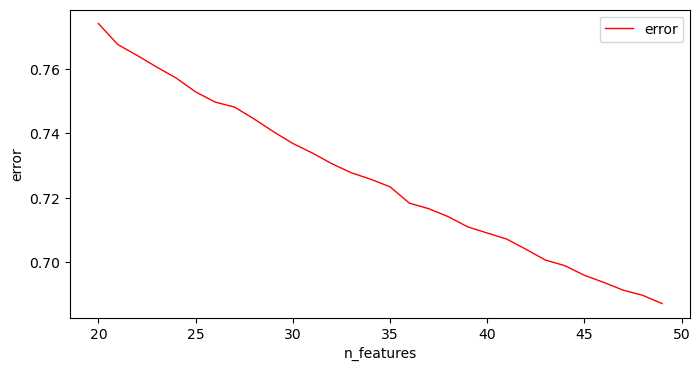

In [ ]:
get_best_K()

In [ ]:
#选择39作为聚类K
K = 39
def classify():
    '''在最优参数下输出聚类结果'''

    make_clear_dir()
    
    global labels
    labels = []
    
    print('loadDataset...')
    dataset = loadDataset()
    print('loadDataset done')
    X, vectorizer = transform(dataset, n_features=1000)
    print('transform done...')
    #在最优参数下进行多次聚类，当分数小于0.72时表示符合要求，并取该次结果为最终结果
    for i in range(0, 1000):
        print('train ', i)
        score = train(X, vectorizer, true_k = K, showLable=True, copyFile=True, printInfo=True, targetScore=0.720)
        print(score)
        if score<0.730:
            break

In [ ]:
classify()

loadDataset...
loadding 0...
loadding 200...
loadding 400...
loadding 600...
loadding 800...
loadding 1000...
loadding 1200...
loadDataset done
transform done...
train  0


FileNotFoundError: [Errno 2] No such file or directory: './data/news_data/以高水平开放推动高质量发展（现场评论·新时代的伟大实践⑫）.txt'